<h1>1. Введение</h1>

<p>Ансамблевые методы занимают центральное место в современной практике машинного обучения, предоставляя мощные инструменты для повышения точности и устойчивости моделей. Основная идея ансамблей заключается в объединении нескольких моделей для создания более сильного инструмента, чем каждая из отдельных моделей по отдельности. Этот подход опирается на принцип, что разнообразие и комбинирование слабых моделей может привести к значительному снижению общей ошибки.</p>

<p>История ансамблевых методов начинается с попыток улучшить производительность одиночных моделей. В 1996 году Leo Breiman опубликовал фундаментальную работу "Bagging Predictors" <a href="#ref1">[1]</a>, в которой предложил метод бутстрап-агрегирования для снижения дисперсии моделей. Он продемонстрировал, что комбинирование нескольких моделей, обученных на различных бутстрап-выборках данных, может значительно улучшить стабильность и точность предсказаний. Этот подход стал основой для дальнейших разработок, таких как случайные леса, которые Брейман представил в 2001 году в работе "Random Forests" <a href="#ref2">[2]</a>. Случайные леса расширяют идею бэггинга, добавляя случайность при выборе признаков для разделения узлов деревьев решений, что способствует увеличению разнообразия моделей в ансамбле и улучшению общей производительности.</p>

<p>Параллельно с развитием бэггинга, Robert E. Schapire в 1990 году представил концепцию "boosting" в своей работе "The Strength of Weak Learnability" <a href="#ref3">[3]</a>. Он доказал, что последовательное комбинирование слабых моделей, каждая из которых немного превосходит случайный выбор, может привести к сильному предсказателю с высокой точностью. В 1996 году Yoav Freund и Robert E. Schapire в свое работе "Experiments with a New Boosting Algorithm" <a href="#ref4">[4]</a> представили алгоритм AdaBoost (Adaptive Boosting), который адаптивно изменяет веса обучающих примеров, акцентируя внимание на тех, которые были неправильно классифицированы предыдущими моделями. AdaBoost стал одним из наиболее влиятельных бустинговых алгоритмов, доказав свою эффективность в различных задачах классификации.</p>

<p>В 2001 году Jerome H. Friedman представил градиентный бустинг в своей работе "Greedy Function Approximation: A Gradient Boosting Machine" <a href="#ref5">[5]</a>. Градиентный бустинг расширил идеи AdaBoost, используя градиентные методы оптимизации для минимизации функции потерь. Этот подход позволил значительно повысить гибкость и мощность бустинговых моделей, сделав их одними из самых эффективных инструментов в арсенале машинного обучения. Популярные реализации градиентного бустинга, такие как XGBoost, LightGBM и CatBoost, продолжают достойно себя показывать в соревнованиях по машинному обучению, демонстрируя хорошие результаты на различных наборах данных.</p>

<p>Помимо бэггинга и бустинга, развитие ансамблевых методов включает такие подходы, как стэкинг и взвешенное голосование. Стэкинг, предложенный в конце 1990-х годов, подразумевает комбинирование различных типов моделей с использованием мета-модели для объединения их предсказаний. Этот метод позволяет интегрировать сильные стороны различных алгоритмов, что приводит к улучшению общей производительности <a href="#ref6">[6]</a>. Взвешенное голосование, с другой стороны, использует различные веса для моделей в ансамбле, основанные на их индивидуальной производительности, что позволяет более эффективно использовать сильные стороны каждой модели.</p>

<p>Одной из ключевых причин популярности ансамблевых методов является их способность эффективно справляться с различными источниками ошибок, такими как высокое смещение и дисперсия. Согласно книге "The Elements of Statistical Learning" <a href="#ref7">[7]</a>, ансамбли помогают найти оптимальный баланс между смещением и дисперсией, что приводит к снижению общей ошибки модели. Это особенно важно в задачах, где одиночные модели могут быть недостаточно точными или подвержены переобучению.</p>

<p>В рамках данной лекции мы рассмотрим основные ансамблевые методы, начиная с их теоретических основ и заканчивая практической реализацией с использованием Google Colab. Мы начнем с обсуждения фундаментальных понятий смещения и дисперсии, которые лежат в основе эффективности ансамблей, а затем перейдем к конкретным методам, таким как бэггинг, бустинг, стэкинг и взвешенное голосование.</p>

<p>Таким образом, цель данной лекции — предоставить всестороннее понимание ансамблевых методов, их теоретических основ и практических возможностей.</p>


<h1>2. Теоретические основы ансамблей</h1>

<p>Ансамблевые методы в машинном обучении основываются на фундаментальных концепциях статистики и теории вероятностей, направленных на улучшение производительности моделей путем комбинирования нескольких базовых предикторов. Основной принцип ансамблей заключается в том, что коллективное решение группы моделей может превзойти по точности и устойчивости любое отдельное предсказание из этой группы. Это утверждение подтверждается как эмпирическими исследованиями, так и теоретическими доказательствами.</p>

<h2>Смещение и дисперсия</h2>

<p>Ключевыми понятиями, лежащими в основе ансамблевых методов, являются смещение (bias) и дисперсия (variance). Смещение характеризует систематическую ошибку модели, то есть насколько предсказания модели отклоняются от истинных значений. Высокое смещение указывает на то, что модель упрощает проблему и не улавливает сложные зависимости в данных, что приводит к недообучению (underfitting).</p>

<p>Дисперсия, с другой стороны, отражает чувствительность модели к изменениям в обучающих данных. Высокая дисперсия означает, что модель слишком точно подстраивается под обучающую выборку, включая шум и выбросы, что приводит к переобучению (overfitting). Баланс между смещением и дисперсией является критически важным для создания моделей, обладающих высокой обобщающей способностью.</p>

<p>Ансамблевые методы стремятся уменьшить дисперсию без значительного увеличения смещения. Это достигается путем объединения предсказаний множества моделей, каждая из которых обучена на разных подвыборках данных или с использованием различных начальных условий. В результате индивидуальные ошибки моделей могут компенсироваться, что ведет к более стабильным и точным предсказаниям.</p>

<h2></h2>

<p>Эффективность ансамблей во многом определяется разнообразием (диверсификацией) базовых моделей. Разнообразие означает, что модели в ансамбле делают разные ошибки и обладают различными предсказательными способностями. Чем более разнообразны модели, тем выше вероятность того, что ошибки одной модели будут компенсированы другими.</p>

<p>Диверсификация может быть достигнута различными способами:</p>

<ol>
  <li>Разные подвыборки данных — каждая модель обучается на различных подмножествах исходных данных </li>
  <li>Разные архитектуры моделей — использование различных типов моделей (например, деревья решений, нейронные сети, SVM) для создания ансамбля</li>
  <li>Разные начальные условия — изменение случайных начальных параметров или использование различных случайных чисел для генерации моделей</li>
</ol>

<h2>Основные принципы</h2>

<p>Основные теоретические принципы ансамблевых методов можно свести к следующим ключевым аспектам:</p>

<ol>
  <li>Уменьшение дисперсии — комбинирование моделей снижает вариативность предсказаний, что ведет к более устойчивым результатам. </li>
  <li>Уменьшение смещения — в некоторых случаях ансамбли могут также уменьшать смещение, особенно когда комбинируются модели с разным смещением.</li>
  <li>Принцип "слабых" и "сильных" моделей — ансамбли могут состоять как из слабых моделей (каждая из которых немного лучше случайного угадывания), так и из сильных моделей, объединение которых улучшает общую производительность</li>
</ol>

<h2>Почему ансамбли эффективны?</h2>

<p>Одним из ключевых теоретических обоснований эффективности ансамблей является теорема о снижении дисперсии. Согласно ней, при условии, что ошибки базовых моделей независимы и имеют одинаковую дисперсию, дисперсия ансамбля уменьшается пропорционально числу объединяемых моделей. Это математически подтверждает, что увеличение числа моделей в ансамбле приводит к снижению общей дисперсии предсказаний.</p>

<p>Работа Robert E. Schapire "The Strength of Weak Learnability" (1990) <a href="#ref3">[3]</a> заложила основы для понимания, как слабые обучающие алгоритмы могут быть объединены в сильный предиктор посредством бустинга. Шапире доказал, что если базовый алгоритм обладает даже небольшой способностью превосходить случайное угадывание, то последовательное применение этого алгоритма может привести к модели с произвольной низкой ошибкой.</p>

<p>Рассмотрим математическую формализацию ансамблевых методов. Пусть у нас есть множество базовых моделей $\left( f_1, f_2, ... , f_M \right)$ каждая из которых является предсказателем для задачи $ y = f(x) $. Ансамбль этих моделей формирует общий предсказатель $ F(x) $, который может быть представлен для бэггинга как</p>

$$ F(x) = \frac{1}{M} \sum^M_{m=1} f_m(x). $$

<p>Для бустинга:</p>

$$ F(x) = \sum^M_{m=1} \alpha_m f_m(x), $$

<p>где $ \alpha_m  $ — весовая коэффициента, определяющая вклад каждой модели в общий предсказатель.</p>

<p>Цель ансамблевых методов — минимизировать общую ошибку ансамбля, что достигается путем оптимизации выбора моделей $ f_m $ и их весов $ \alpha_m $. Это требует тщательного подбора базовых моделей и стратегии их комбинирования, чтобы обеспечить максимальное снижение общей ошибки.</p>


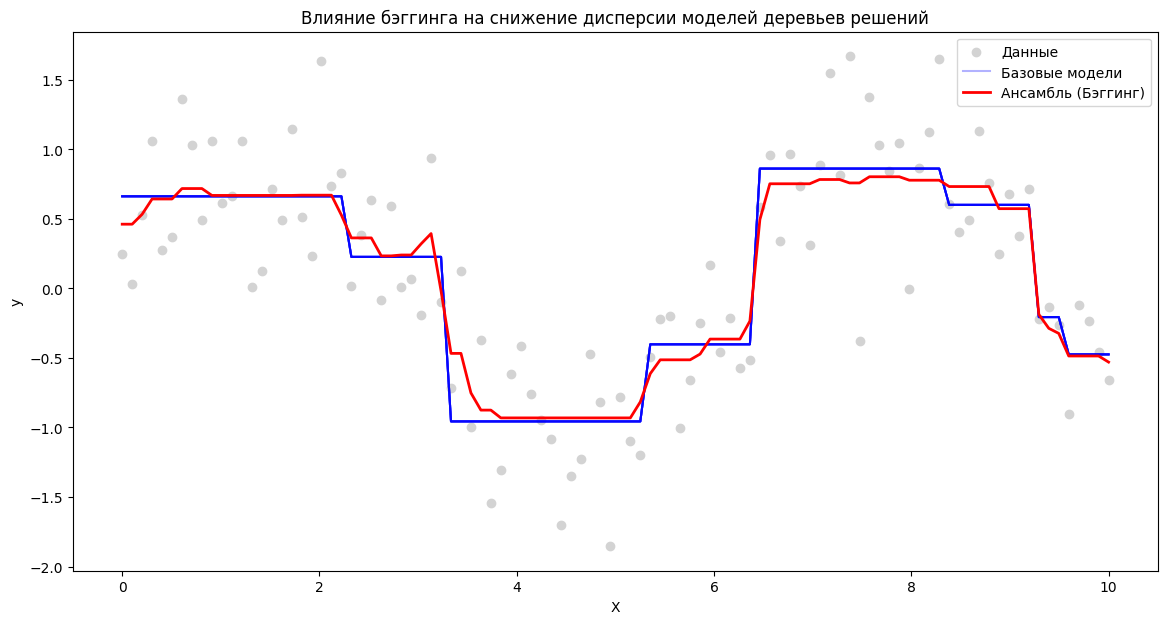

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# Генерация данных
np.random.seed(42)
# Генератор случайных чисел фиксируется для воспроизводимости результатов

X = np.linspace(0, 10, 100).reshape(-1, 1)
# Создаем 100 равномерно распределённых точек в диапазоне от 0 до 10
# Преобразуем в двумерный массив с 1 столбцом, так как модели ожидают 2D данные

y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])
# Формируем целевую переменную на основе синусоиды с добавлением гауссовского шума
# ravel() преобразует массив в одномерный

# Обучение базовых моделей (деревья решений с максимальной глубиной)
n_estimators = 10
# Количество базовых моделей (деревьев решений)

models = [DecisionTreeRegressor(max_depth=3, random_state=i) for i in range(n_estimators)]
# Создаём список из 10 деревьев решений, каждое с максимальной глубиной 3
# Параметр random_state задаёт уникальное начальное состояние для каждого дерева для разнообразия моделей

for model in models:
    model.fit(X, y)
# Обучаем каждую модель (дерево решений) на данных (X, y)

# Обучение ансамбля с помощью бэггинга
ensemble = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                            n_estimators=n_estimators,
                            random_state=42)
# Создаём ансамбль с помощью метода бэггинга, используя дерево решений с глубиной 3 в качестве базовой модели
# Параметр n_estimators задаёт количество деревьев в ансамбле (10)
# random_state фиксирует начальное состояние для воспроизводимости результата

ensemble.fit(X, y)
# Обучаем ансамбль на тех же данных (X, y)

# Визуализация
plt.figure(figsize=(14, 7))
# Создаём фигуру для графика размером 14x7 дюймов

plt.scatter(X, y, label='Данные', color='lightgray')
# Строим график исходных данных в виде разброса точек (scatter plot)
# Используем светло-серый цвет для данных

# Предсказания отдельных деревьев
for i, model in enumerate(models):
    plt.plot(X, model.predict(X), color='blue', alpha=0.3, label='Базовые модели' if i == 0 else "")
# Строим предсказания каждого отдельного дерева решений
# Каждое дерево отображается с полупрозрачными синими линиями (alpha=0.3)
# Добавляем метку "Базовые модели" только для первого дерева

# Предсказания ансамбля
plt.plot(X, ensemble.predict(X), color='red', label='Ансамбль (Бэггинг)', linewidth=2)
# Отображаем предсказания ансамбля
# Красная линия с меткой "Ансамбль (Бэггинг)" отображает результат усреднения предсказаний всех деревьев

plt.legend()
# Отображаем легенду, которая объясняет метки для базовых моделей и ансамбля

plt.title('Влияние бэггинга на снижение дисперсии моделей деревьев решений')
# Заголовок графика, описывающий влияние ансамблирования на дисперсию

plt.xlabel('X')
# Метка для оси X

plt.ylabel('y')
# Метка для оси Y

plt.show()
# Отображаем график

<h1>3. Бэггинг (Bootstrap Aggregating)</h1>

<img src="https://drive.google.com/uc?id=1p0VlfY6_2tErXdS-KNht7M7SZCZsi6Hd" alt="" width="700"/>

<p>Бэггинг (сокращение от Bootstrap Aggregating) представляет собой один из наиболее фундаментальных ансамблевых методов в машинном обучении, предложенный в 1996 году. Основная цель бэггинга — уменьшить вариативность (дисперсию) модели без увеличения её смещения, что достигается путем объединения предсказаний нескольких базовых моделей, обученных на различных подвыборках исходных данных.</p>

<p>Основная идея бэггинга заключается в создании множества обучающих подмножеств из исходного набора данных с помощью метода бутстрап-выборок, то есть случайного выбора с возвращением. Каждое подмножество используется для обучения отдельной базовой модели, например, дерева решений. После обучения всех моделей их предсказания объединяются, обычно путем усреднения для задач регрессии или голосования по большинству для задач классификации. Такой подход позволяет сгладить случайные колебания, возникающие из-за вариативности обучающих данных, что приводит к снижению общей дисперсии модели.</p>

<p>Breiman L. в своей работе "Bagging Predictors" <a href="#ref1">[1]</a> продемонстрировал, что бэггинг значительно повышает стабильность и точность предсказаний, особенно для моделей с высокой дисперсией, таких как деревья решений. Ключевым аспектом его успеха является разнообразие базовых моделей, достигаемое за счет различных бутстрап-выборок данных.</p>

<p>Рассмотрим формальную постановку бэггинга. Пусть имеется исходный набор данных $ D = \{(x_i, y_i)\}_{i=1}^{N} $, где $ x_i $ — признаки, а $ y_i $ — целевая переменная. Бэггинг включает следующие шаги:</p>

<ol>
  <li>Бутстрап-выборка. Создание $ M $ бутстрап-выборок $ D_1, D_2, \ldots, D_M $, каждая из которых формируется путем случайного отбора $ N $ образцов из $ D $ с возвращением.</li>
  <li>Обучение базовых моделей. Для каждой выборки $ D_m $ обучается базовая модель $ f_m $, например, дерево решений.</li>
  <li>Агрегация предсказаний. Для задачи регрессии итоговое предсказание ансамбля $ F(x) $ вычисляется как среднее арифметическое предсказаний всех базовых моделей:
  $$ F(x) = \frac{1}{M} \sum_{m=1}^{M} f_m(x), $$
  а для задачи классификации используется метод голосования по большинству.</li>
</ol>

<p>Эта простая, но эффективная процедура позволяет существенно снизить вариативность предсказаний, что подтверждается теоретическими результатами и эмпирическими исследованиями.</p>

<h2>Случайные леса</h2>

<p>Случайные леса, предложенные также Breiman L. в 2001 году в работе "Random Forests" <a href="#ref2">[2]</a>, представляют собой усовершенствование метода бэггинга. В случайных лесах добавляется дополнительный уровень случайности при построении деревьев решений, что еще больше увеличивает разнообразие базовых моделей и улучшает общую производительность ансамбля.</p>

<p>Основные отличия случайных лесов от классического бэггинга заключаются в следующем:</p>

<ol>
  <li>Случайный выбор признаков. При каждом разбиении узла дерева решений случайно выбирается подмножество признаков, из которых выбирается лучший для разделения. Это предотвращает сильную корреляцию между деревьями и способствует их разнообразию.</li>
  <li>Большое количество деревьев. Случайные леса обычно содержат большое количество деревьев, что обеспечивает более стабильные и точные предсказания.</li>
</ol>

<p>Математически, случайные леса можно представить как специальный случай бэггинга, где каждая базовая модель $ f_m $ обучается на бутстрап-выборке данных и случайном подмножестве признаков. Итоговое предсказание ансамбля осуществляется аналогично бэггингу: усреднением для регрессии или голосованием для классификации.</p>

<h2>Преимущества и ограничения</h2>

<p>Преимущества:</p>

<ul>
  <li>Снижение дисперсии. Комбинирование множества моделей уменьшает вариативность предсказаний, делая ансамбль более устойчивым к изменению обучающих данных</li>
  <li>Устойчивость к переобучению. Бэггинг помогает предотвратить переобучение, особенно в случае моделей с высокой дисперсией, таких как деревья решений</li>
  <li>Простота реализации. Метод бэггинга легко реализуется и параллелизуется, что делает его эффективным с точки зрения вычислительных ресурсов</li>
</ul>

<p>Ограничения:</p>

<ul>
<li>Не снижает смещение. Бэггинг в основном направлен на снижение дисперсии и не оказывает значительного влияния на смещение модели. Если базовые модели имеют высокое смещение, ансамбль также будет обладать высоким смещением</li>
<li>Зависимость от базовых моделей. Эффективность бэггинга зависит от выбора базовых моделей. Слабые или неадекватные модели могут не принести значительных улучшений</li>
<li>Вычислительная сложность. Хотя бэггинг параллелизуется, обучение большого количества моделей может потребовать значительных вычислительных ресурсов, особенно для сложных моделей и больших наборов данных</li>
</ul>

<hr>

<p>Для демонстрации работы бэггинга мы рассмотрим классификационную задачу на реальном наборе данных — Breast Cancer Wisconsin (Diagnostic) Dataset, доступном в библиотеке Scikit-learn. Эта задача заключается в классификации опухолей как доброкачественных или злокачественных на основе различных измерений клеток.</p>

<p>Набор данных Breast Cancer Wisconsin (Diagnostic) содержит 569 наблюдений с 30 признаками, извлечёнными из цифровых изображений биопсийных опухолей. Признаки включают различные характеристики клеток, такие как размер и форма ядра.</p>


Точность базовой модели (Дерево решений): 91.81%
Точность ансамбля (Бэггинг): 94.15%

Матрица ошибок для базовой модели:
[[ 57   7]
 [  7 100]]

Отчёт классификации для базовой модели:
              precision    recall  f1-score   support

   malignant       0.89      0.89      0.89        64
      benign       0.93      0.93      0.93       107

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171


Матрица ошибок для ансамбля:
[[ 58   6]
 [  4 103]]

Отчёт классификации для ансамбля:
              precision    recall  f1-score   support

   malignant       0.94      0.91      0.92        64
      benign       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



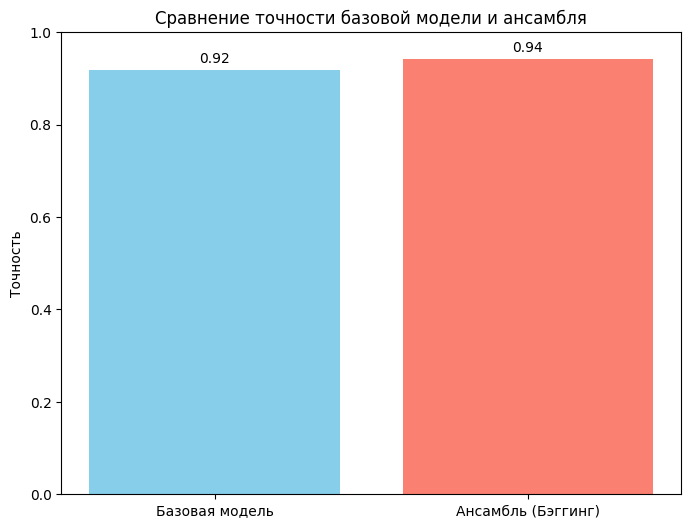

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# 1. Загрузка данных
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names
# Загрузка набора данных о раке, который уже встроен в библиотеку sklearn.
# X — это признаки (различные характеристики клеток), y — целевая переменная (0 — здоров, 1 — злокачественная опухоль).

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Разделяем данные на обучающую (70%) и тестовую (30%) выборки с использованием стратификации, чтобы сохранить пропорцию классов.

# 3. Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Применяем стандартизацию признаков (преобразуем их к распределению с мат. ожиданием 0 и дисперсией 1).
# Стандартизация важна для корректной работы алгоритмов, особенно деревьев решений, если используются метрики расстояний.

# 4. Обучение базовой модели (дерево решений)
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train_scaled, y_train)
y_pred_base = base_model.predict(X_test_scaled)
accuracy_base = accuracy_score(y_test, y_pred_base)
# Обучаем базовую модель дерева решений и предсказываем целевые значения на тестовых данных.
# Рассчитываем точность предсказаний для базовой модели.

# 5. Обучение ансамбля с использованием бэггинга
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    random_state=42
)
# Создаём ансамбль с использованием бэггинга, где базовой моделью является дерево решений.
# n_estimators=50 указывает на количество деревьев в ансамбле.
# max_samples=0.8 и max_features=0.8 определяют, что каждое дерево обучается на 80% случайных подвыборок данных и признаков.
# bootstrap=True позволяет каждой модели обучаться на случайных выборках с повторениями.

bagging_model.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_model.predict(X_test_scaled)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
# Обучаем ансамбль на тех же обучающих данных и оцениваем точность его предсказаний на тестовых данных.

# 6. Оценка производительности
print("Точность базовой модели (Дерево решений): {:.2f}%".format(accuracy_base * 100))
print("Точность ансамбля (Бэггинг): {:.2f}%".format(accuracy_bagging * 100))
# Выводим точность базовой модели и ансамбля в процентах.

print("\nМатрица ошибок для базовой модели:")
print(confusion_matrix(y_test, y_pred_base))
# Выводим матрицу ошибок для базовой модели, которая показывает количество верных и неверных предсказаний для каждого класса.

print("\nОтчёт классификации для базовой модели:")
print(classification_report(y_test, y_pred_base, target_names=target_names))
# Выводим отчёт классификации для базовой модели, который содержит метрики точности (precision), полноты (recall) и F1-меры для каждого класса.

print("\nМатрица ошибок для ансамбля:")
print(confusion_matrix(y_test, y_pred_bagging))
# Выводим матрицу ошибок для ансамбля.

print("\nОтчёт классификации для ансамбля:")
print(classification_report(y_test, y_pred_bagging, target_names=target_names))
# Выводим отчёт классификации для ансамбля.

# 7. Визуализация сравнения точности
methods = ['Базовая модель', 'Ансамбль (Бэггинг)']
accuracies = [accuracy_base, accuracy_bagging]

plt.figure(figsize=(8, 6))
bars = plt.bar(methods, accuracies, color=['skyblue', 'salmon'])
# Строим столбчатую диаграмму для сравнения точности базовой модели и ансамбля.
# Столбики окрашены в разные цвета для визуального разделения моделей.

plt.ylim([0, 1])
plt.ylabel('Точность')
plt.title('Сравнение точности базовой модели и ансамбля')
# Задаём ограничения для оси Y от 0 до 1 (проценты точности) и добавляем метки.

# Добавление значений точности над столбиками
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')
# Добавляем текстовые метки с точными значениями точности над каждым столбиком.

plt.show()
# Отображаем финальный график.

<h2>4. Бустинг (Boosting)</h2>

<img src="https://drive.google.com/uc?id=1mGS54ZxP3pAsh9UMF8hAQqaJIK6_IEBF" alt="" width="700"/>

<p>Бустинг представляет собой один из наиболее эффективных и широко используемых ансамблевых методов в машинном обучении. В отличие от бэггинга, который направлен преимущественно на снижение дисперсии моделей, бустинг фокусируется как на снижении дисперсии, так и на уменьшении смещения. Основная идея бустинга заключается в последовательном обучении моделей, каждая из которых стремится исправить ошибки предыдущих моделей, что в конечном итоге приводит к созданию сильного предиктора с высокой точностью.</p>

<p>Термин "бустинг" происходит от английского слова "boost", что означает "ускорение" или "поддержка". В контексте машинного обучения бустинг относится к процессу усиления слабых моделей до уровня сильных предикторов. Слабая модель — это такая модель, которая чуть лучше случайного угадывания. Последовательное обучение таких моделей позволяет постепенно уменьшать ошибки ансамбля.</p>

<p>Основная интуиция бустинга состоит в том, чтобы сфокусироваться на тех примерах из обучающего набора данных, которые были неправильно предсказаны предыдущими моделями. Каждая новая модель в ансамбле обучается на ошибках предыдущих моделей, что позволяет ансамблю последовательно улучшать свою производительность.</p>

<p>Рассмотрим формальную постановку бустинга. Пусть имеется исходный набор данных $ D = \{(x_i, y_i)\}_{i=1}^{N} $, где $ x_i $ — признаки, а $ y_i $ — целевая переменная. Бустинг включает следующие шаги:</p>

<ol>
  <li>Инициализация весов. Каждому примеру обучающего набора данных назначается вес $ w_i $, отражающий его важность. В начале все веса равны</li>
  <li>Обучение базовой модели. На каждом шаге обучается базовая модель $ f_m $ с учетом текущих весов $ w_i $</li>
  <li>Обновление весов. После обучения модели $ f_m $ веса примеров обновляются таким образом, чтобы увеличить важность тех примеров, которые были неправильно предсказаны</li>
  <li>Агрегация моделей. Итоговое предсказание ансамбля формируется как взвешенная сумма предсказаний базовых моделей:
    $$ F(x) = \sum_{m=1}^{M} \alpha_m f_m(x), $$
    где $ \alpha_m $ — весовая коэффициента, определяющая вклад каждой модели в общий предсказатель.
  </li>
</ol>

<p>Существует несколько популярных алгоритмов бустинга, каждый из которых имеет свои особенности и применения. Рассмотрим основные из них:</p>

<h2>AdaBoost (Adaptive Boosting)</h2>

<p>Одним из первых и наиболее известных алгоритмов бустинга является AdaBoost, предложенный в 1996 году. AdaBoost адаптивно изменяет веса обучающих примеров, акцентируя внимание на тех, которые были неправильно классифицированы предыдущими моделями.</p>

<p>Алгоритм AdaBoost для классификации:</p>

<ol>
  <li>Инициализация весов. Все примеры получают одинаковые веса.</li>
  <li>Повторение для каждого базового классификатора:
    <ul>
      <li>Обучить базовый классификатор $ f_m $ на текущем наборе данных с весами $ w_i $.</li>
      <li>Вычислить ошибку классификатора: $ \epsilon_m = \frac{\sum_{i=1}^{N} w_i \cdot \mathbb{I}(f_m(x_i) \neq y_i)}{\sum_{i=1}^{N} w_i}, $
        где $ \mathbb{I} $ — индикаторная функция.
      </li>
      <li>Вычислить вес модели: $ \alpha_m = \frac{1}{2} \ln\left(\frac{1 - \epsilon_m}{\epsilon_m}\right). $
      </li>
      <li>Обновить веса примеров: $ w_i \leftarrow w_i \cdot e^{-\alpha_m y_i f_m(x_i)} $ и нормализовать их.
      </li>
    </ul>
  </li>
  <li>Формирование ансамбля. Итоговое предсказание ансамбля — взвешенное голосование базовых классификаторов.</li>
</ol>

<p>AdaBoost демонстрирует высокую эффективность на задачах классификации, особенно когда базовые модели имеют высокую точность и небольшую дисперсию.</p>

<h2>Градиентный бустинг (Gradient Boosting)</h2>

<p>Градиентный бустинг, предложенный в 2001 году, представляет собой обобщение идеи бустинга с использованием градиентных методов оптимизации для минимизации функции потерь. В отличие от AdaBoost, который фокусируется на снижении ошибки классификации, градиентный бустинг может быть применен как к задачам классификации, так и к задачам регрессии.</p>

<p>Основные шаги градиентного бустинга:</p>

<ol>
  <li>Инициализация. Начальная модель $ F_0(x) $ обычно представляет собой константу, равную среднему значению целевой переменной.</li>
  <li>Повторение для каждого шага бустинга:
    <ul>
      <li>Вычислить остатки (градиенты) по текущей модели: $ r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x) = F_{m-1}(x)}, $ где $ L $ — функция потерь.
      </li>
      <li>Обучить базовую модель $ f_m(x) $ на остатках $ r_{im} $.</li>
      <li>Вычислить оптимальный шаг $ \gamma_m $: $ \gamma_m = \arg\min_{\gamma} \sum_{i=1}^{N} L(y_i, F_{m-1}(x_i) + \gamma f_m(x_i)) $
      </li>
      <li>Обновить модель: $ F_m(x) = F_{m-1}(x) + \gamma_m f_m(x) $ </li>
    </ul>
  </li>
  <li>Формирование ансамбля. Итоговое предсказание ансамбля — сумма всех базовых моделей.</li>
</ol>

<p>Градиентный бустинг отличается гибкостью и способностью адаптироваться к различным функциям потерь, что делает его мощным инструментом для широкого спектра задач.</p>

<p>Существует несколько оптимизированных реализаций градиентного бустинга, которые обеспечивают высокую производительность и эффективность:</p>

<ul>
  <li>XGBoost (eXtreme Gradient Boosting). Разработанный в 2016 году, он известен своей скоростью и эффективностью благодаря использованию параллельных вычислений и оптимизированной структуры данных. Также включает регуляризацию для предотвращения переобучения.</li>
  <li>LightGBM. Разработанный Microsoft, он оптимизирован для работы с большими объемами данных и обладает высокой скоростью обучения. Он использует градиентный бустинг с решающими деревьями, основанный на алгоритме "градиентного листопада" (Gradient-based One-Side Sampling).</li>
  <li>CatBoost. Разработанный Яндексом, CatBoost специализируется на обработке категориальных признаков и минимизации смещения, связанного с порядком данных. Он также включает множество оптимизаций для улучшения производительности и точности.</li>
</ul>

<hr>

<p>Рассмотрим практическое применение бустингового метода XGBoost для задачи классификации на известном наборе данных "Ирисы" (Iris Dataset). Мы продемонстрируем, как XGBoost превосходит базовые модели по точности и устойчивости, а также рассмотрим важность признаков и визуализацию результатов.</p>

<p>Набор данных "Ирисы" является одним из самых известных и широко используемых в машинном обучении. Он содержит 150 образцов ирисов, разделенных на три вида (Setosa, Versicolor, Virginica), с четырьмя признаками: длина и ширина чашелистика, длина и ширина лепестка.</p>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка набора данных Iris из sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
# Загружаем данные из встроенного датасета Iris в библиотеке sklearn.
# X — это признаки (длина и ширина чашелистиков и лепестков), y — целевые метки (виды цветов).
# feature_names содержит названия признаков, target_names — названия видов.

# Преобразование в DataFrame для удобства
df = pd.DataFrame(X, columns=feature_names)
# Преобразуем матрицу признаков X в DataFrame для удобного анализа и визуализации.
# Столбцы DataFrame получают названия признаков из feature_names.

df['species'] = y
# Добавляем столбец 'species' с целевыми метками (0, 1, 2).

df['species'] = df['species'].map({i: name for i, name in enumerate(target_names)})
# Преобразуем числовые метки целевых значений в строковые названия видов (setosa, versicolor, virginica).
# Это делается с помощью метода map(), который сопоставляет каждое числовое значение с названием вида.

# Просмотр первых строк данных
print(df.head())
# Выводим первые пять строк DataFrame для ознакомления с данными.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Разделяем данные на обучающую и тестовую выборки:
# - X и y — признаки и целевые метки, соответственно.
# - test_size=0.3 указывает, что 30% данных будет использовано для тестирования, а 70% — для обучения.
# - random_state=42 фиксирует случайное разбиение, чтобы результаты были воспроизводимы.
# - stratify=y гарантирует, что пропорция классов (видов) в обучающей и тестовой выборках останется такой же, как и в исходных данных.

print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')
# Выводим размер обучающей и тестовой выборок.
# X_train.shape[0] и X_test.shape

Размер обучающей выборки: 105
Размер тестовой выборки: 45


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Инициализация и обучение модели дерева решений
tree_clf = DecisionTreeClassifier(random_state=42)
# Инициализируем модель дерева решений с фиксированным random_state для воспроизводимости результатов.

tree_clf.fit(X_train, y_train)
# Обучаем модель на обучающих данных (X_train, y_train). Модель изучает зависимости между признаками и целевыми метками.

# Предсказания и оценка
y_pred_tree = tree_clf.predict(X_test)
# Выполняем предсказания на тестовых данных (X_test) с использованием обученной модели.
# y_pred_tree содержит предсказанные метки классов для тестовых данных.

accuracy_tree = accuracy_score(y_test, y_pred_tree)
# Оцениваем точность модели как долю правильно предсказанных классов на тестовых данных.

print(f'Точность дерева решений: {accuracy_tree:.2f}')
# Выводим точность модели в виде процента (точность = число правильных предсказаний / общее число предсказаний).

print('Отчет классификации:\n', classification_report(y_test, y_pred_tree, target_names=target_names))
# Выводим отчет классификации, который содержит метрики точности (precision), полноты (recall) и F1-меры для каждого класса.
# Параметр target_names передает названия классов (видов ирисов) для удобного отображения отчета.

Точность дерева решений: 0.93
Отчет классификации:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [ ]:
import xgboost as xgb

# Инициализация и обучение модели XGBoost
xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    random_state=42,
    eval_metric='mlogloss'
)
# Инициализируем классификатор XGBoost с несколькими важными параметрами:
# - objective='multi:softprob' указывает, что задача — многоклассовая классификация, где модель будет предсказывать вероятности классов.
# - num_class=3 указывает, что у нас 3 класса (виды ирисов).
# - random_state=42 фиксирует случайное начальное состояние для воспроизводимости.
# - eval_metric='mlogloss' выбирает логарифмическую потерю (log loss) как метрику оценки, которая используется для оптимизации во время обучения.

xgb_clf.fit(X_train, y_train)
# Обучаем модель XGBoost на тренировочных данных (X_train, y_train).
# Модель использует градиентный бустинг над деревьями решений для улучшения точности.

# Предсказания и оценка
y_pred_xgb = xgb_clf.predict(X_test)
# Выполняем предсказания на тестовых данных (X_test) с использованием обученной модели XGBoost.
# y_pred_xgb содержит предсказанные метки классов для тестовых данных.

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# Оцениваем точность модели XGBoost, вычисляя долю правильно предсказанных классов на тестовых данных.

print(f'Точность XGBoost: {accuracy_xgb:.2f}')
# Выводим точность модели XGBoost в виде процента.

print('Отчет классификации:\n', classification_report(y_test, y_pred_xgb, target_names=target_names))
# Выводим отчет классификации, который показывает метрики precision, recall и F1-мера для каждого из классов.
# Параметр target_names указывает на названия классов (видов ирисов), чтобы отчет был более интерпретируемым.

Точность XGBoost: 0.93
Отчет классификации:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



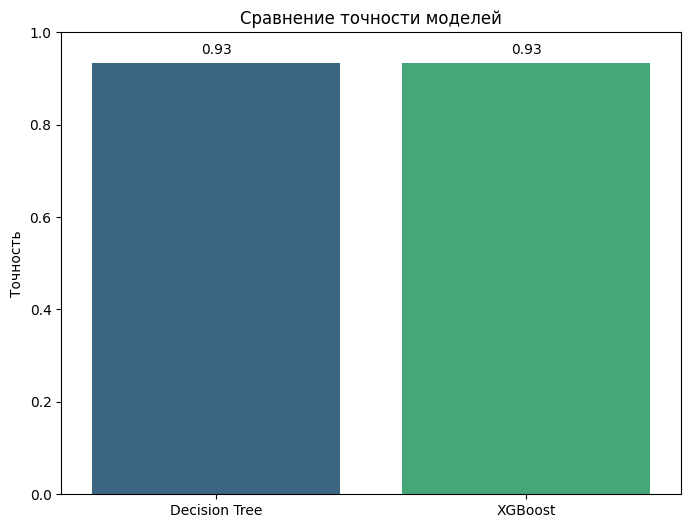

In [ ]:
# Визуализация точности
models = ['Decision Tree', 'XGBoost']
accuracies = [accuracy_tree, accuracy_xgb]
# Создаём два списка: один с названиями моделей, другой с их точностями, которые мы ранее вычислили (точность дерева решений и XGBoost).

plt.figure(figsize=(8, 6))
# Создаём графическую область для построения диаграммы, задав размер фигуры 8x6 дюймов.

sns.barplot(x=models, y=accuracies, hue=models, palette='viridis', dodge=False, legend=False)
# Используем `seaborn` для построения столбчатой диаграммы, где:
# - x=models: по оси X — названия моделей.
# - y=accuracies: по оси Y — соответствующие значения точности.
# - hue=models: задаёт цветовое кодирование для каждой модели, однако здесь оно не нужно, так как столбцы представляют уникальные модели.
# - palette='viridis': цветовая палитра для столбцов.
# - dodge=False: отключает смещение столбцов (в данном случае мы не сравниваем несколько категорий в одном графике, так что смещение не нужно).
# - legend=False: отключаем легенду, поскольку названия моделей очевидны на оси X.

plt.ylim(0, 1)
# Ограничиваем диапазон оси Y от 0 до 1, так как точность моделей выражается в виде долей от 0 до 1 (или в процентах).

plt.title('Сравнение точности моделей')
plt.ylabel('Точность')
# Добавляем заголовок графика и метку для оси Y (Точность), чтобы график был более информативным.

# Добавляем текстовые метки над столбцами с точными значениями точности
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center')
# Для каждого столбца добавляем текстовую метку над ним:
# - index — это индекс столбца (0 для первой модели и 1 для второй).
# - value — это точное значение точности для соответствующей модели.
# - plt.text размещает текстовое значение (точность) немного выше вершины каждого столбца (на 0.02 выше значения).
# - ha='center' выравнивает текст по центру столбца.

plt.show()
# Отображаем готовый график с визуализацией сравнения точности моделей.

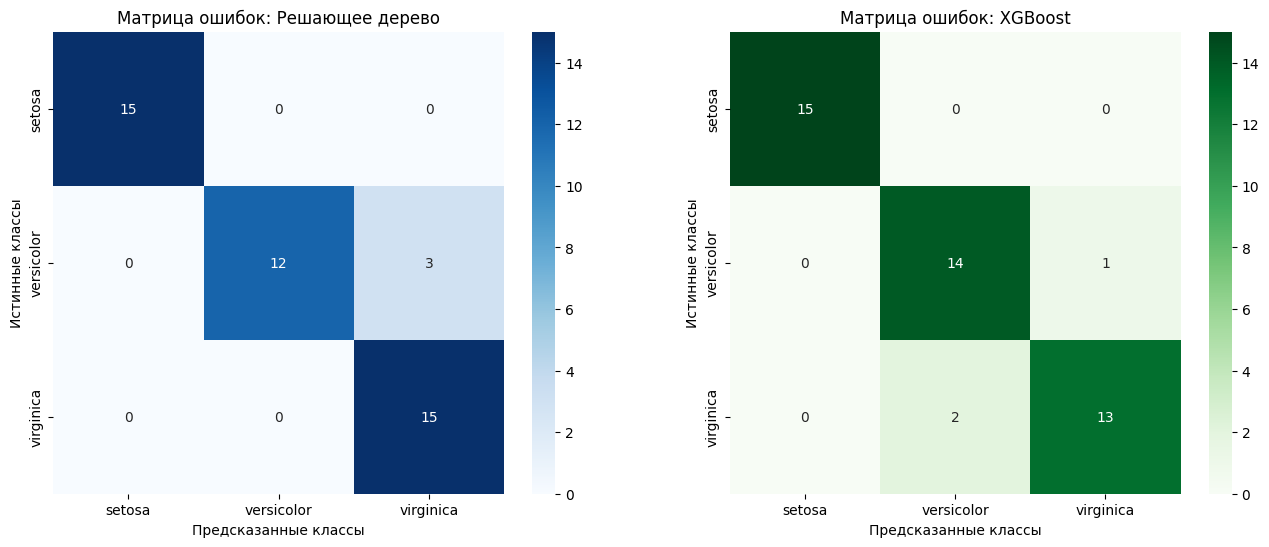

In [ ]:
# Визуализация матриц ошибок
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Создаем область для отображения двух графиков (по одному для каждой модели) с использованием `subplots`.
# Параметры 1, 2 означают, что у нас будет один ряд и два столбца для графиков.
# figsize=(16, 6) задает размер графической области 16x6 дюймов, что обеспечивает достаточно места для двух графиков.

# Матрица ошибок для дерева решений
cm_tree = confusion_matrix(y_test, y_pred_tree)
# Вычисляем матрицу ошибок для модели дерева решений. Эта матрица показывает количество верных и неверных предсказаний для каждого класса.

sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=target_names, yticklabels=target_names)
# Строим тепловую карту для матрицы ошибок:
# - `annot=True`: отображаем значения внутри ячеек матрицы.
# - `fmt='d'`: отображаем значения в целочисленном формате.
# - `cmap='Blues'`: используем цветовую карту с оттенками синего цвета.
# - `ax=axes[0]`: указываем, что эта тепловая карта должна быть размещена на первом графике (слева).
# - `xticklabels` и `yticklabels`: устанавливаем метки осей X и Y в соответствии с названиями классов (target_names).

axes[0].set_title('Матрица ошибок: дерево решений')
# Устанавливаем заголовок для первой матрицы ошибок.

axes[0].set_xlabel('Предсказанные классы')
axes[0].set_ylabel('Истинные классы')
# Устанавливаем метки осей для первой матрицы ошибок.

# Матрица ошибок для XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
# Вычисляем матрицу ошибок для модели XGBoost.

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=target_names, yticklabels=target_names)
# Строим тепловую карту для матрицы ошибок XGBoost:
# - `cmap='Greens'`: используем цветовую карту с оттенками зеленого цвета.
# - `ax=axes[1]`: указываем, что эта тепловая карта должна быть размещена на втором графике (справа).

axes[1].set_title('Матрица ошибок: XGBoost')
# Устанавливаем заголовок для второй матрицы ошибок.

axes[1].set_xlabel('Предсказанные классы')
axes[1].set_ylabel('Истинные классы')
# Устанавливаем метки осей для второй матрицы ошибок (их можно убрать, если диаграммы рядом).

plt.show()
# Отображаем графики.

<p>Рассмотрим практическое применение бустингового метода XGBoost для задачи классификации на реальном наборе данных "Adult Income" (также известном как "Census Income"). Этот пример демонстрирует, как бустинг значительно превосходит базовые модели по точности и устойчивости, а также предоставляет возможность анализа важности признаков.</p>

<p>Набор данных "Adult Income" используется для прогнозирования, превышает ли годовой доход человека $50,000, основываясь на демографических и экономических признаках. Данные содержат информацию о возрасте, образовании, профессии, заработке и других характеристиках. Задача классификации состоит в том, чтобы предсказать бинарную метку: <=50K или >50K.</p>

In [ ]:
# Импортирование необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Загрузка набора данных "Adult Income" из UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Чтение данных
df = pd.read_csv(url, header=None, names=columns, na_values=" ?", sep=',\s', engine='python')
# Загружаем набор данных "Adult Income" и определяем названия столбцов.
# Указываем на необходимость замены пропущенных значений (" ?") на NaN и используем разделитель ", ".

In [ ]:
# Просмотр первых строк данных
print("Первые пять строк набора данных:")
print(df.head())

# Проверка наличия пропущенных значений
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

# Удаление строк с пропущенными значениями
df.dropna(inplace=True)

# Проверка снова
print("\nПосле удаления пропущенных значений:")
print(df.isnull().sum())
# Проверяем и выводим пропущенные значения. Удаляем строки с пропущенными данными для упрощения работы с набором данных.

Первые пять строк набора данных:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1        

In [ ]:
# Инициализация LabelEncoder
le = LabelEncoder()

# Преобразование категориальных признаков
categorical_features = [
    "workclass", "education", "marital-status",
    "occupation", "relationship", "race", "sex", "native-country"
]

for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])
# Преобразуем категориальные признаки в числовые с помощью LabelEncoder, что необходимо для работы большинства моделей машинного обучения.

# Преобразование целевой переменной
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
# Преобразуем целевую переменную "income" в бинарный формат: 1 для дохода >50K и 0 для <=50K.

In [ ]:
# Определение признаков и целевой переменной
X = df.drop('income', axis=1)
y = df['income']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Разделяем данные на обучающие и тестовые выборки. Используем стратификацию для сохранения пропорции классов в выборках.

In [ ]:
# Обучение базовой модели: дерево решений
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Предсказания и оценка для дерева решений
y_pred_tree = tree_clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f'\nТочность дерева решений: {accuracy_tree:.2f}')
print('Отчет классификации (дерево решений):\n', classification_report(y_test, y_pred_tree))
# Обучаем и оцениваем модель дерева решений, вычисляем точность и выводим подробный отчет классификации.


Точность дерева решений: 0.81
Отчет классификации (дерево решений):
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4945
           1       0.61      0.64      0.62      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.75      6513
weighted avg       0.82      0.81      0.81      6513



In [ ]:
# Обучение бустинговой модели: XGBoost
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
xgb_clf.fit(X_train, y_train)

# Предсказания и оценка для XGBoost
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f'\nТочность XGBoost: {accuracy_xgb:.2f}')
print('Отчет классификации (XGBoost):\n', classification_report(y_test, y_pred_xgb))
# Аналогично обучаем и оцениваем модель XGBoost, выводим отчет классификации и точность.


Точность XGBoost: 0.87
Отчет классификации (XGBoost):
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4945
           1       0.77      0.68      0.72      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.81      0.82      6513
weighted avg       0.87      0.87      0.87      6513



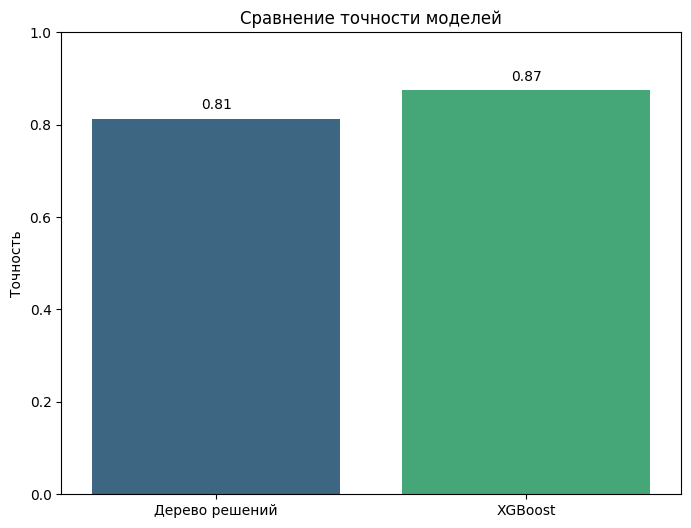

In [ ]:
# Визуализация точности моделей
models = ['Дерево решений', 'XGBoost']
accuracies = [accuracy_tree, accuracy_xgb]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette='viridis', dodge=False, legend=False)
plt.ylim(0, 1)
plt.title('Сравнение точности моделей')
plt.ylabel('Точность')
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center')

plt.show()
# Визуализируем точности моделей (дерево решений и XGBoost) с помощью столбчатой диаграммы.
# Добавляем значения точности над каждым столбцом для наглядности.

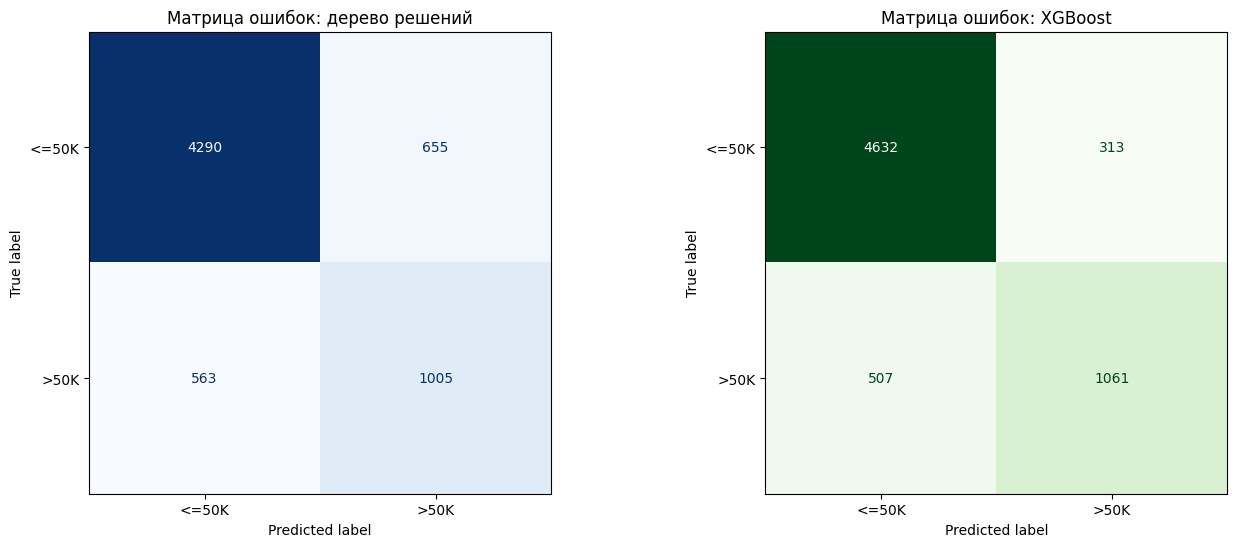

In [ ]:
# Визуализация матриц ошибок
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Матрица ошибок для решающего дерева
ConfusionMatrixDisplay.from_estimator(
    tree_clf, X_test, y_test, display_labels=['<=50K', '>50K'],
    cmap='Blues', ax=axes[0], colorbar=False
)
axes[0].set_title('Матрица ошибок: дерево решений')

# Матрица ошибок для XGBoost
ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test, display_labels=['<=50K', '>50K'],
    cmap='Greens', ax=axes[1], colorbar=False
)
axes[1].set_title('Матрица ошибок: XGBoost')

plt.show()
# Отображаем матрицы ошибок для обеих моделей, что позволяет увидеть, как каждая модель справляется с классификацией классов.

<h1>5. Стэкинг</h1>

<img src="https://drive.google.com/uc?id=15XEOiMucIpuC015W0sTije9CAGnt0QoG" alt="" width="900"/>

<p> Стэкинг, или стекинг, является одним из наиболее мощных ансамблевых методов, позволяющих комбинировать различные модели машинного обучения для достижения улучшенной производительности. В отличие от бэггинга и бустинга, которые обычно используют однотипные модели (например, несколько деревьев решений), стэкинг допускает использование разнообразных моделей, что способствует увеличению разнообразия ансамбля и, как следствие, повышению его обобщающей способности. </p>

<p> Основная идея стэкинга заключается в том, чтобы объединить предсказания нескольких базовых моделей (первого уровня) и использовать их в качестве входных данных для мета-модели (второго уровня), которая обучается на этих предсказаниях для формирования окончательного прогноза. Такая двухуровневая архитектура позволяет мета-модели учесть слабые стороны отдельных базовых моделей и скорректировать их предсказания, улучшая общую точность ансамбля. </p>

<p> Архитектура стэкинга обычно состоит из следующих компонентов: </p>

<ol>
  <li>Базовые модели (First-level models). Это могут быть различные алгоритмы, такие как логистическая регрессия, деревья решений, SVM, нейронные сети и другие. Разнообразие моделей способствует созданию более богатого набора признаков для мета-модели.</li>

  <li>Мета-модель (Second-level model). Чаще всего используется простая модель, такая как линейная регрессия или логистическая регрессия, которая обучается на предсказаниях базовых моделей. Однако, можно использовать и более сложные модели, в зависимости от задачи и сложности данных.</li>

  <li>Одним из ключевых аспектов успешного применения стэкинга является предотвращение утечек данных (data leakage), особенно при обучении мета-модели. Для этого часто используется кросс-валидация на уровне базовых моделей, что обеспечивает независимость предсказаний для обучения мета-модели.</li>
</ol>

<p>Преимущества стэкинга:</p>

<ol>
  <li>Улучшенная точность. Комбинирование различных моделей позволяет ансамблю захватывать более сложные паттерны в данных.</li>
  <li>Гибкость. Возможность использовать разнообразные алгоритмы и архитектуры моделей.</li>
  <li>Устойчивость к переобучению. Разнообразие моделей помогает снизить риск переобучения по сравнению с использованием одной модели.</li>
</ol>

<p>Но стэкинг также имеет свои недостатки:</p>
<ol>
  <li>Сложность реализации. Требует тщательной настройки и контроля за процессом обучения, особенно при использовании нескольких уровней моделей.</li>
  <li>Высокие вычислительные затраты. Обучение множества моделей может быть ресурсоемким, особенно на больших наборах данных.</li>
</ol>

<hr>

<p>Рассмотрим практическую реализацию стэкинга на примере задачи классификации датасета Fashion-MNIST. Мы будем использовать три базовые модели: логистическую регрессию, случайный лес и нейронную сеть, а также мета-модель — логистическую регрессию.</p>

In [8]:
!pip install tensorflow

In [9]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Модули для работы с массивами, датафреймами и визуализацией:
# - numpy: для работы с массивами и числовыми операциями.
# - pandas: для работы с таблицами (DataFrame) и структурированными данными.
# - matplotlib.pyplot и seaborn: для построения графиков и визуализации данных.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Импортируем модули для обучения и оценки моделей машинного обучения:
# - train_test_split: для разделения данных на обучающие и тестовые выборки.
# - accuracy_score, classification_report, confusion_matrix: для оценки моделей (точность, отчеты классификации и матрица ошибок).

In [11]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Модули для работы с Keras, глубоким обучением и нейронными сетями:
# - fashion_mnist: встроенный набор данных Fashion-MNIST, который содержит изображения одежды для задач классификации.
# - to_categorical: для кодирования целевых переменных в категориальный (one-hot) формат.
# - Sequential, Dense, Flatten, Conv2D, MaxPooling2D, Dropout: для построения нейронных сетей, включая полносвязные слои, сверточные слои и слои подвыборки (pooling).
# - EarlyStopping: для остановки обучения, если производительность на валидационной выборке перестает улучшаться (это помогает избежать переобучения).

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

# Модели машинного обучения:
# - LogisticRegression: линейная модель для классификации.
# - RandomForestClassifier: ансамблевый метод с использованием случайного леса (несколько решающих деревьев).
# - GradientBoostingClassifier: модель градиентного бустинга, которая обучается на ошибках предыдущих моделей.
# - SVC: метод опорных векторов для классификации.

In [13]:
from sklearn.ensemble import StackingClassifier

# StackingClassifier: ансамблевый метод, который объединяет несколько моделей и использует мета-модель для предсказаний на основе предсказаний базовых моделей.

In [14]:
import tensorflow as tf

# TensorFlow используется для построения и тренировки нейронных сетей.

In [15]:
# Проверка доступности GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Проверяем, сколько GPU доступно для использования TensorFlow, чтобы ускорить обучение моделей.
# Если GPU доступен, обучение моделей глубокого обучения, таких как сверточные нейронные сети (CNN), может выполняться значительно быстрее.

Num GPUs Available:  1


In [16]:
# Загрузка данных
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# Загружаем набор данных Fashion-MNIST с использованием встроенной функции Keras.
# - X_train и y_train содержат изображения и метки для тренировочной выборки.
# - X_test и y_test содержат изображения и метки для тестовой выборки.
# Размер каждого изображения составляет 28x28 пикселей, а метки представляют один из 10 классов одежды.

In [17]:
# Нормализация данных
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
# Нормализуем данные, приводя значения пикселей от 0 до 255 в диапазон от 0 до 1.
# Это стандартный шаг для работы с изображениями, так как он улучшает сходимость моделей глубокого обучения и помогает избежать больших численных значений во время обучения.
# - astype('float32'): Преобразуем тип данных в float32, чтобы работать с числом с плавающей запятой.
# - / 255.: Нормализуем данные, деля на максимальное значение пикселя (255).

In [18]:
# Добавление канала для сверточных слоев
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
# Добавляем дополнительный канал для изображений, чтобы подготовить данные для сверточных слоев (Conv2D) в нейронной сети.
# - np.expand_dims(X_train, -1): Добавляем новый размер в конце массива для обозначения канала (например, 28x28x1, где 1 — это канал).
# В задачах работы с изображениями это необходимо, так как сверточные слои ожидают данные в формате (высота, ширина, каналы), где "каналы" — это количество цветовых каналов (например, 1 для черно-белых изображений или 3 для RGB).

In [19]:
# Разделение тренировочных данных на тренировочные и валидационные
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Разделяем тренировочные данные на тренировочную и валидационную выборки.
# - test_size=0.2: 20% тренировочных данных выделяются для валидационной выборки, чтобы использовать её для оценки производительности модели в процессе обучения.
# - random_state=42: фиксируем случайное разбиение для воспроизводимости.
# Валидационная выборка используется для мониторинга производительности модели на данных, которые она не видела, что позволяет избежать переобучения и настроить гиперпараметры.

In [20]:
def create_cnn_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64, kernel_size=(3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    # Создаем модель с использованием последовательного подхода (Sequential).
    # - Первый слой Conv2D с 32 фильтрами, размером ядра (kernel_size) 3x3 и функцией активации ReLU. Этот слой принимает входные изображения размером 28x28 пикселей и один канал.
    # - MaxPooling2D с размером пула (pool_size) 2x2 уменьшает размерность изображения, сокращая его в два раза по каждой оси.
    # - Второй слой Conv2D с 64 фильтрами и той же размерностью ядра (3x3), и снова применяется ReLU.
    # - Еще один слой MaxPooling2D для уменьшения размерности.
    # - Flatten: Преобразуем данные из двумерного вида в одномерный для работы с полносвязными слоями.
    # - Dense слой с 128 нейронами и активацией ReLU.
    # - Dropout: Используется с вероятностью 0.5 для предотвращения переобучения (исключает случайные нейроны на каждой итерации).
    # - Последний Dense слой с 10 выходными нейронами (по количеству классов в Fashion-MNIST) и функцией активации softmax для многоклассовой классификации.

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # Компилируем модель:
    # - optimizer='adam': используем оптимизатор Adam, который хорошо работает с нейронными сетями.
    # - loss='categorical_crossentropy': используем категориальную кросс-энтропию для многоклассовой классификации.
    # - metrics=['accuracy']: в качестве метрики для мониторинга используем точность.

    return model
# Функция возвращает собранную модель CNN.

In [21]:
# Преобразование меток в категориальные
y_train_cat = to_categorical(y_train, 10)
y_val_cat = to_categorical(y_val, 10)
y_test_cat = to_categorical(y_test, 10)
# Преобразуем метки классов из целых чисел в категориальный формат (one-hot encoding):
# - to_categorical(y_train, 10): преобразует метки в массивы, где каждому классу соответствует вектор длиной 10, содержащий 1 в позиции класса и 0 в остальных позициях.
# Это необходимо для корректной работы с функцией потерь categorical_crossentropy.

In [22]:
# Создание и обучение модели
cnn_model = create_cnn_model()
# Создаем экземпляр модели CNN, используя функцию create_cnn_model.

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# Используем раннюю остановку (EarlyStopping) для предотвращения переобучения:
# - monitor='val_accuracy': мониторим точность на валидационной выборке.
# - patience=5: обучение будет остановлено, если точность на валидационных данных не улучшится в течение 5 эпох.
# - restore_best_weights=True: после завершения обучения восстановим веса модели, когда она показала наилучшую производительность на валидационной выборке.

history = cnn_model.fit(X_train, y_train_cat,
                        epochs=50,
                        batch_size=128,
                        validation_data=(X_val, y_val_cat),
                        callbacks=[early_stop],
                        verbose=2)
# Обучаем модель:
# - X_train и y_train_cat: тренировочные данные и метки.
# - epochs=50: максимальное количество эпох (обучение может остановиться раньше из-за ранней остановки).
# - batch_size=128: используем размер мини-батча в 128 образцов.
# - validation_data=(X_val, y_val_cat): валидационная выборка используется для мониторинга и оценки во время обучения.
# - callbacks=[early_stop]: передаем callback для ранней остановки.
# - verbose=2: выводим информацию об обучении для каждой эпохи.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
375/375 - 14s - 38ms/step - accuracy: 0.7464 - loss: 0.6992 - val_accuracy: 0.8368 - val_loss: 0.4442
Epoch 2/50
375/375 - 2s - 6ms/step - accuracy: 0.8374 - loss: 0.4533 - val_accuracy: 0.8668 - val_loss: 0.3620
Epoch 3/50
375/375 - 3s - 8ms/step - accuracy: 0.8607 - loss: 0.3893 - val_accuracy: 0.8742 - val_loss: 0.3376
Epoch 4/50
375/375 - 7s - 18ms/step - accuracy: 0.8737 - loss: 0.3510 - val_accuracy: 0.8828 - val_loss: 0.3074
Epoch 5/50
375/375 - 3s - 9ms/step - accuracy: 0.8808 - loss: 0.3267 - val_accuracy: 0.8875 - val_loss: 0.2956
Epoch 6/50
375/375 - 4s - 9ms/step - accuracy: 0.8885 - loss: 0.3051 - val_accuracy: 0.8992 - val_loss: 0.2731
Epoch 7/50
375/375 - 4s - 11ms/step - accuracy: 0.8956 - loss: 0.2881 - val_accuracy: 0.8955 - val_loss: 0.2776
Epoch 8/50
375/375 - 3s - 9ms/step - accuracy: 0.9024 - loss: 0.2737 - val_accuracy: 0.9057 - val_loss: 0.2538
Epoch 9/50
375/375 - 2s - 6ms/step - accuracy: 0.9054 - loss: 0.2616 - val_accuracy: 0.9022 - val_loss: 0.25

In [23]:
# Оценка модели
cnn_val_pred = np.argmax(cnn_model.predict(X_val), axis=1)
cnn_val_acc = accuracy_score(y_val, cnn_val_pred)
print(f'CNN Validation Accuracy: {cnn_val_acc:.4f}')
# Оцениваем модель на валидационной выборке:
# - cnn_model.predict(X_val): получаем предсказанные вероятности для каждого класса на валидационных данных.
# - np.argmax(..., axis=1): преобразуем вероятности в метки классов (выбираем класс с наибольшей вероятностью для каждого примера).
# - accuracy_score(y_val, cnn_val_pred): вычисляем точность модели на валидационной выборке.
# Выводим точность модели (CNN Validation Accuracy).

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Validation Accuracy: 0.9207


In [24]:
# Преобразование данных для scikit-learn
X_train_flat = X_train.reshape(-1, 28*28)
X_val_flat = X_val.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)
# Преобразуем данные изображений из 3D-массивов в 2D-массивы для использования с моделями scikit-learn.
# - X_train: имеет форму (число образцов, 28, 28, 1), что представляет собой трёхмерные данные (двумерное изображение и канал).
# - reshape(-1, 28*28): преобразуем каждое изображение размером 28x28 пикселей в одномерный массив длиной 784 (28*28), где каждый пиксель становится отдельным признаком.
# - -1 в reshape указывает, что число образцов остаётся неизменным.
# Теперь:
# - X_train_flat: тренировочные данные представлены в виде двумерного массива (число образцов, 784).
# - X_val_flat: валидационные данные также преобразованы в двумерный массив.
# - X_test_flat: тестовые данные имеют тот же формат.

In [25]:
# Случайный лес
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# Инициализируем модель случайного леса:
# - n_estimators=100: создаём ансамбль из 100 решающих деревьев. Большее количество деревьев увеличивает стабильность и точность модели, но увеличивает затраты по времени.
# - random_state=42: фиксируем начальное состояние для воспроизводимости.
# - n_jobs=-1: используем все доступные ядра процессора для параллельного обучения деревьев, что ускоряет обучение.

rf.fit(X_train_flat, y_train)
# Обучаем модель на тренировочных данных, преобразованных в плоский формат (векторы признаков вместо двумерных изображений).
# RandomForestClassifier обучает каждый решающий дерево на случайной подвыборке данных и признаков, что помогает избежать переобучения и повышает устойчивость модели.

rf_val_pred = rf.predict(X_val_flat)
# Выполняем предсказания на валидационной выборке, чтобы оценить, как модель случайного леса справляется с ранее не виденными данными.

rf_val_acc = accuracy_score(y_val, rf_val_pred)
# Оцениваем точность предсказаний модели случайного леса на валидационных данных.

print(f'Random Forest Validation Accuracy: {rf_val_acc:.4f}')
# Выводим точность модели на валидационной выборке с точностью до 4 знаков.

Random Forest Validation Accuracy: 0.8812


In [26]:
# LightGBM
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
# Инициализируем модель LightGBM:
# - n_estimators=100: Количество деревьев в ансамбле (итераций бустинга). Большое количество деревьев помогает модели лучше обучаться, но увеличивает время обучения.
# - random_state=42: Фиксируем начальное состояние для воспроизводимости результатов. Это обеспечивает получение тех же результатов при каждом запуске.
# LightGBM использует градиентный бустинг деревьев решений с оптимизированными вычислениями, что делает его быстрее, чем другие методы бустинга.

lgb_clf.fit(X_train_flat, y_train)
# Обучаем модель на плоских (векторных) тренировочных данных. LightGBM быстро обучает деревья, корректируя ошибки предыдущих деревьев на каждом шаге бустинга.

lgb_val_pred = lgb_clf.predict(X_val_flat)
# Выполняем предсказания на валидационной выборке с помощью обученной модели LightGBM.

lgb_val_acc = accuracy_score(y_val, lgb_val_pred)
# Оцениваем точность предсказаний модели на валидационных данных.

print(f'LightGBM Validation Accuracy: {lgb_val_acc:.4f}')
# Выводим точность модели LightGBM на валидационной выборке с точностью до 4 знаков.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.088750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 169738
[LightGBM] [Info] Number of data points in the train set: 48000, number of used features: 783
[LightGBM] [Info] Start training from score -2.303002
[LightGBM] [Info] Start training from score -2.306551
[LightGBM] [Info] Start training from score -2.303627
[LightGBM] [Info] Start training from score -2.299257
[LightGBM] [Info] Start training from score -2.303002
[LightGBM] [Info] Start training from score -2.304879
[LightGBM] [Info] Start training from score -2.306342
[LightGBM] [Info] Start training from score -2.294080
[LightGBM] [Info] Start training from score -2.301960
[LightGBM] [Info] Start training from score -2.303210
LightGBM Validation Accuracy: 0.8994


In [30]:
# Инициализация CatBoost
cb = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42, verbose=0)
# Инициализируем модель CatBoost:
# - iterations=100: количество итераций (аналог количества деревьев). Чем больше итераций, тем точнее модель, но дольше обучение.
# - depth=6: глубина деревьев. Чем глубже дерево, тем больше модель может улавливать сложные зависимости в данных.
# - learning_rate=0.1: скорость обучения. Небольшие значения помогают модели учиться более точно, но увеличивают время обучения.
# - random_state=42: фиксируем начальное состояние для воспроизводимости результатов.
# - verbose=0: отключаем вывод промежуточных результатов обучения для повышения скорости.

cb.fit(X_train_flat, y_train)
# Обучаем модель CatBoost на тренировочных данных, представленных в плоском формате.

cb_val_pred = cb.predict(X_val_flat)
# Выполняем предсказания на валидационной выборке.

cb_val_acc = accuracy_score(y_val, cb_val_pred)
# Оцениваем точность модели CatBoost на валидационных данных.

print(f'CatBoost Validation Accuracy: {cb_val_acc:.4f}')
# Выводим точность модели CatBoost на валидационной выборке с точностью до 4 знаков.


CatBoost Validation Accuracy: 0.8529


In [31]:
# Определение базовых моделей для стэкинга
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
    ('lgb', lgb.LGBMClassifier(n_estimators=100, random_state=42)),
    ('cb', CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42, verbose=0))
]
# Создаём список базовых моделей для стэкинга:
# - ('rf', RandomForestClassifier(...)): случайный лес с 100 деревьями решений. Этот метод работает путём построения нескольких деревьев решений на случайных подвыборках данных и признаков, что помогает избежать переобучения и устойчив к шуму. Хорошо справляется с большими наборами данных.
# - ('lgb', lgb.LGBMClassifier(...)): LightGBM с 100 деревьями. Это эффективный метод градиентного бустинга деревьев решений, который быстро обучается и хорошо обрабатывает большие объёмы данных с минимальными затратами ресурсов.
# - ('cb', CatBoostClassifier(...)): CatBoost с 100 итерациями и глубиной деревьев 6. CatBoost — это мощный метод бустинга деревьев решений, который обеспечивает быстрое обучение, особенно при работе с большими наборами данных. Он также имеет встроенную поддержку категориальных признаков и эффективно работает на сложных задачах.

In [32]:
# Метамодель
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)
# Определяем ансамблевую модель стэкинга (StackingClassifier):
# - estimators: список базовых моделей, определённых ранее (случайный лес, SVM, градиентный бустинг).
# - final_estimator=LogisticRegression(): метамодель (логистическая регрессия), которая будет обучаться на предсказаниях базовых моделей. Она объединяет информацию от всех базовых моделей для улучшения конечного результата.
# - cv=5: используется кросс-валидация с 5 фолдами для оценки базовых моделей во время обучения.
# - n_jobs=-1: позволяет использовать все доступные ядра процессора для параллельного выполнения операций, что ускоряет обучение.

In [33]:
# Обучение стэкинга
stacking_clf.fit(X_train_flat, y_train)
# Обучаем модель стэкинга на тренировочных данных (X_train_flat и y_train).
# Базовые модели сначала обучаются на тренировочных данных. Их предсказания используются для обучения метамодели (логистической регрессии).
# Стэкинг позволяет метамодели находить наилучшие комбинации предсказаний от базовых моделей, что часто приводит к улучшению точности классификации.

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_jobs=-1,
                                                       random_state=42)),
                               ('lgb', LGBMClassifier(random_state=42)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x7e851b1fbdc0>)],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [34]:
# Предсказание и оценка
stacking_val_pred = stacking_clf.predict(X_val_flat)
# Выполняем предсказания с помощью обученной модели стэкинга на валидационной выборке.

stacking_val_acc = accuracy_score(y_val, stacking_val_pred)
# Оцениваем точность предсказаний на валидационной выборке с использованием accuracy_score (доля правильных предсказаний).

print(f'Stacking Ensemble Validation Accuracy: {stacking_val_acc:.4f}')
# Выводим точность модели стэкинга на валидационной выборке с точностью до 4 знаков после запятой.

Stacking Ensemble Validation Accuracy: 0.9001


In [35]:
# Создание таблицы результатов
results = pd.DataFrame({
    'Модель': ['CNN', 'Random Forest', 'LightGBM', 'CatBoost', 'Stacking Ensemble'],
    'Точность на валидации': [cnn_val_acc, rf_val_acc, lgb_val_acc, cb_val_acc, stacking_val_acc]
})
# Создаем DataFrame с результатами:
# - В колонке 'Модель' указываем названия моделей, которые мы обучали (CNN, случайный лес, LightGBM, CatBoost, стэкинг).
# - В колонке 'Точность на валидации' указываем соответствующие точности моделей на валидационной выборке (cnn_val_acc, rf_val_acc, lgb_val_acc, cb_val_acc, stacking_val_acc).
# Этот DataFrame позволяет наглядно сравнить производительность всех обученных моделей.

print(results)
# Выводим таблицу с результатами, чтобы увидеть точность каждой модели на валидационной выборке.

              Модель  Точность на валидации
0                CNN               0.920667
1      Random Forest               0.881250
2           LightGBM               0.899417
3           CatBoost               0.852917
4  Stacking Ensemble               0.900083


<h1>6. Взвешенное голосование (Weighted Voting)</h1>

<p>Взвешенное голосование является одним из простых, но эффективных методов ансамблевого обучения, который позволяет объединять предсказания нескольких моделей для получения более точного и устойчивого результата. В отличие от простого голосования большинства, где все модели имеют равный вклад, взвешенное голосование назначает каждой модели определенный вес в зависимости от её производительности. Это позволяет более успешным моделям оказывать большее влияние на итоговое предсказание, улучшая общую точность ансамбля.</p>

<p>Основная идея взвешенного голосования заключается в том, чтобы воспользоваться сильными сторонами каждой отдельной модели и компенсировать их слабости. В ансамбле с равными весами все модели вносят одинаковый вклад, что может быть недостаточно эффективно, особенно если некоторые модели существенно превосходят другие. Взвешенное голосование решает эту проблему, присваивая моделям веса пропорционально их качеству.</p>

<p>Выделяют два основных типа голосования:</p>

<ol>
  <li>Жесткое голосование. Каждая модель делает предсказание, и итоговый результат определяется большинством голосов. В случае классификации это означает выбор класса, получившего наибольшее количество голосов от базовых моделей.</li>

  <li>Мягкое голосование. Каждая модель предоставляет вероятностное распределение по классам, и итоговое предсказание основывается на усреднении этих вероятностей. Этот подход обычно обеспечивает более плавные и точные предсказания, особенно в задачах с множественными классами.</li>
</ol>

<p>Назначение весовых коэффициентов моделям основывается на их производительности на валидационной выборке. Наиболее распространённым методом является использование метрики точности, F1-меры или другой релевантной метрики для оценки вклада каждой модели. Вес каждой модели пропорционален её способности правильно предсказывать целевой класс, что позволяет ансамблю быть более надёжным и устойчивым к ошибкам отдельных моделей.</p>

<hr>

<p>Для иллюстрации принципа взвешенного голосования рассмотрим задачу классификации на датасете Wine Quality. В этой задаче требуется предсказать качество вина на основе различных химических характеристик.</p>

<p>Задача: Классификация вин по качеству на основе набора признаков.</p>

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')
# Загружаем набор данных о качестве красного вина. В данном наборе данных каждая строка представляет характеристики вина, а столбец 'quality' содержит оценку его качества.

X = data.drop('quality', axis=1)
y = data['quality']
# Разделяем набор данных на признаки (X) и целевую переменную (y). Признаки содержат физико-химические свойства вина, а 'quality' — это оценка качества.

In [37]:
# Бинаризация целевой переменной для упрощения
y = y.apply(lambda x: 1 if x >= 7 else 0)
# Преобразуем целевую переменную 'quality' в бинарный формат:
# - 1, если качество вина больше или равно 7 (высокое качество),
# - 0, если качество вина ниже 7 (низкое качество).
# Это делается для упрощения задачи, чтобы вместо многоклассовой классификации решить задачу бинарной классификации.

In [38]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Разделяем данные на обучающую и тестовую выборки в пропорции 70% и 30% соответственно.
# random_state=42 обеспечивает воспроизводимость разбиения данных.

# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Применяем стандартизацию к признакам с помощью StandardScaler:
# - fit_transform() на обучающей выборке вычисляет параметры для масштабирования (среднее и стандартное отклонение) и преобразует данные.
# - transform() применяет те же параметры стандартизации к тестовой выборке.
# Стандартизация данных (приведение к распределению со средним 0 и стандартным отклонением 1) улучшает сходимость многих моделей машинного обучения.

In [39]:
# Инициализация базовых моделей с разными алгоритмами
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42)
# Определяем три модели для классификации:
# - clf1: Логистическая регрессия.
# - clf2: Решающее дерево.
# - clf3: Метод опорных векторов (SVC) с включенным параметром probability=True, который позволяет вычислять вероятности классов для дальнейшего использования в ансамблевых моделях.
# Параметр random_state=42 фиксирует начальное состояние для воспроизводимости результатов.

In [40]:
# Обучение моделей
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
# Обучаем каждую модель на обучающих данных (X_train, y_train).
# - fit() обучает модель, находя зависимости между признаками и целевой переменной.

SVC(probability=True, random_state=42)

In [46]:
# Оценка точности отдельных моделей
preds1 = clf1.predict(X_test)
preds2 = clf2.predict(X_test)
preds3 = clf3.predict(X_test)
# Для каждой модели получаем предсказания на тестовых данных (X_test).
# - predict() возвращает предсказанные классы для каждого примера тестовой выборки.

acc1 = accuracy_score(y_test, preds1)
acc2 = accuracy_score(y_test, preds2)
acc3 = accuracy_score(y_test, preds3)
# Оцениваем точность каждой модели, вычисляя долю правильных предсказаний на тестовой выборке.
# accuracy_score() возвращает долю верных предсказаний (True Positive и True Negative).

print(f'Logistic Regression Accuracy: {acc1:.4f}')
print(f'Decision Tree Accuracy: {acc2:.4f}')
print(f'SVM Accuracy: {acc3:.4f}')
# Выводим точность для каждой модели с точностью до двух знаков после запятой.

Logistic Regression Accuracy: 0.8646
Decision Tree Accuracy: 0.8604
SVM Accuracy: 0.8812


In [47]:
# Определение весов на основе точности моделей
weights = [acc1, acc2, acc3]
# Веса для голосования моделей в ансамбле устанавливаются пропорционально их точности:
# - acc1: точность логистической регрессии.
# - acc2: точность решающего дерева.
# - acc3: точность SVC.
# Модель с более высокой точностью получит больший вес, что сделает её вклад в итоговое решение более значимым.

In [48]:
# Создание ансамбля с взвешенным голосованием
ensemble = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt', clf2),
    ('svc', clf3)
], voting='soft', weights=weights)
# Создаём ансамбль VotingClassifier, который объединяет три модели:
# - ('lr', clf1): логистическая регрессия.
# - ('dt', clf2): решающее дерево.
# - ('svc', clf3): метод опорных векторов.
# voting='soft': используем мягкое голосование, которое учитывает вероятности предсказаний (вместо классов), это позволяет моделям взвешивать свои решения с учётом уверенности.
# weights=weights: указываем веса для моделей на основе их точности, чтобы их вклад в ансамбль зависел от точности.

In [49]:
# Обучение ансамбля
ensemble.fit(X_train, y_train)
# Обучаем ансамбль VotingClassifier на обучающей выборке (X_train, y_train).
# Ансамбль обучается на тех же данных, что и базовые модели, и использует их предсказания для комбинирования решений.

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft',
                 weights=[0.8645833333333334, 0.8604166666666667, 0.88125])

In [50]:
# Предсказание и оценка точности ансамбля
ensemble_preds = ensemble.predict(X_test)
# Предсказания ансамбля на тестовых данных (X_test) с использованием метода predict().
# Предсказания основываются на взвешенном голосовании базовых моделей.

ensemble_acc = accuracy_score(y_test, ensemble_preds)
# Оцениваем точность ансамбля на тестовой выборке, вычисляя долю правильных предсказаний.

print(f'Ensemble Accuracy: {ensemble_acc:.4f}')
# Выводим точность ансамбля с точностью до двух знаков после запятой.

Ensemble Accuracy: 0.8750


In [60]:
# Влияние весов на итоговую точность
weight_combinations = [
    [1, 1, 1],               # Равные веса для всех моделей
    [acc1, acc2, acc3],      # Веса, пропорциональные точности каждой модели
    [2, 1, 1],               # Логистическая регрессия получает больший вес
    [1, 2, 1],               # Решающее дерево получает больший вес
    [1, 1, 2],               # Метод опорных векторов получает больший вес
]
# Определяем набор комбинаций весов для эксперимента:
# - [1, 1, 1]: Равные веса для всех моделей.
# - [acc1, acc2, acc3]: Веса, пропорциональные точности каждой модели.
# - [2, 1, 1]: Логистическая регрессия имеет удвоенный вес по сравнению с другими моделями.
# - [1, 2, 1]: Решающее дерево имеет удвоенный вес.
# - [1, 1, 2]: Метод опорных векторов имеет удвоенный вес.

In [61]:
for w in weight_combinations:
    ensemble = VotingClassifier(estimators=[
        ('lr', clf1),
        ('dt', clf2),
        ('svc', clf3)
    ], voting='soft', weights=w)
    ensemble.fit(X_train, y_train)
    preds = ensemble.predict(X_test)
    print(f'Комбинация весов {w}: Точность = {accuracy_score(y_test, preds):.4f}')
# Для каждой комбинации весов создаём ансамбль VotingClassifier:
# - estimators: те же три базовые модели (логистическая регрессия, решающее дерево, SVM).
# - weights=w: задаём веса, которые определяют вклад каждой модели в предсказания.
# Затем обучаем ансамбль на обучающей выборке (X_train, y_train) и вычисляем точность на тестовых данных (X_test).

Комбинация весов [1, 1, 1]: Точность = 0.8729
Комбинация весов [0.8645833333333334, 0.8604166666666667, 0.88125]: Точность = 0.8750
Комбинация весов [2, 1, 1]: Точность = 0.8729
Комбинация весов [1, 2, 1]: Точность = 0.8604
Комбинация весов [1, 1, 2]: Точность = 0.8708


<h1>Список литературы</h1>
<ol>
    <li> <a name="ref1"> Breiman, L. (1996). Bagging predictors. <i>Machine Learning</i>, 24(2), 123-140. Available at: <a href="https://machine-learning.martinsewell.com/ensembles/bagging/Breiman1996.pdf">https://machine-learning.martinsewell.com/ensembles/bagging/Breiman1996.pdf</a></a></li>
    <li> <a name="ref2">Breiman, L. (2001). Random Forests. <i>Machine Learning</i>, 45(1), 5-32. Available at: <a href="https://link.springer.com/article/10.1023/A:1010933404324">https://link.springer.com/article/10.1023/A:1010933404324</a></a></li>
    <li> <a name="ref3">Schapire, R. E. (1990). The strength of weak learnability. <i>Machine Learning</i>, 5(2), 197-227</a></li>
    <li> <a name="ref4">Freund, Y., & Schapire, R. E. (1996). Experiments with a new boosting algorithm. <i>Machine Learning: Proceedings of the Thirteenth International Conference</i>. Available at: <a href="https://machine-learning.martinsewell.com/ensembles/boosting/FreundSchapire1996.pdf">https://machine-learning.martinsewell.com/ensembles/boosting/FreundSchapire1996.pdf</a></a></li>
    <li> <a name="ref5">Friedman, J. H. (2001). Greedy function approximation: A gradient boosting machine. <i>Annals of Statistics</i>, 29(5), 1189-1232. Available at: <a href="https://www.cse.cuhk.edu.hk/irwin.king/_media/presentations/2001_greedy_function_approximation_a_gradient_boosting_machine.pdf">https://www.cse.cuhk.edu.hk/irwin.king/_media/presentations/2001_greedy_function_approximation_a_gradient_boosting_machine.pdf</a></a></li>
    <li> <a name="ref7">Wolpert, D. H. (1992). Stacked generalization. <i>Neural Networks</i>, 5(2), 241-259</a></li>
    <li> <a name="ref6">Hastie, T., Tibshirani, R., & Friedman, J. (2009). <i>The Elements of Statistical Learning</i>. 2nd edition. Springer. Available at: <a href="https://link.springer.com/book/10.1007/978-0-387-84858-7">https://link.springer.com/book/10.1007/978-0-387-84858-7</a></a> </li>
</ol>

</body>
</html>